# Clusters 
## Clustering con DBSCAN e Visualizzazione:

In questa implementazione, abbiamo utilizzato l'algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) per eseguire il clustering dei dati. Abbiamo utilizzato la libreria scikit-learn per eseguire DBSCAN. Dopo aver eseguito il clustering, abbiamo visualizzato i risultati utilizzando Matplotlib. Il codice comprende:

- Creazione di dati di esempio (puoi sostituire con i tuoi dati reali).
- Creazione di un oggetto DBSCAN con parametri epsilon (ε) e minPts specificati.
- Esecuzione del clustering sui dati e ottenimento delle etichette di cluster.
- Visualizzazione dei punti dati colorati in base alle etichette di cluster.


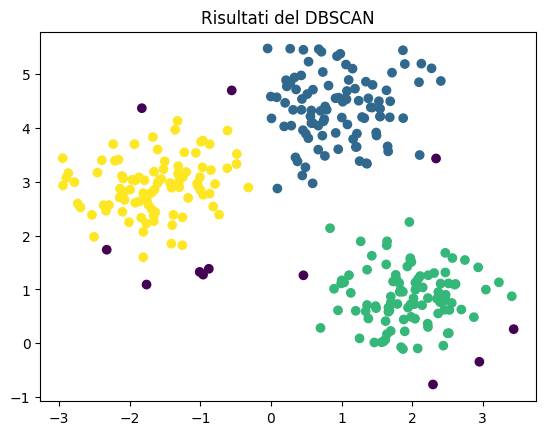

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Crea dati di esempio (puoi sostituire questo passaggio con i tuoi dati)
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Crea un oggetto DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Esegui il clustering sui dati
labels = dbscan.fit_predict(data)

# Visualizza i risultati
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title("Risultati del DBSCAN")
plt.show()


## Selezione di Punti Rappresentativi per Cluster:

In questa implementazione, abbiamo esteso l'esempio precedente per selezionare un punto rappresentativo per ogni cluster. Abbiamo creato una funzione get_representative_points che calcola il punto medio (media) dei punti all'interno di ciascun cluster. Il codice comprende:

- Creazione di dati di esempio (puoi sostituire con i tuoi dati reali).
- Creazione di un oggetto DBSCAN con parametri epsilon (ε) e minPts specificati.
- Esecuzione del clustering sui dati e ottenimento delle etichette di cluster.
- Definizione di una funzione per ottenere i punti rappresentativi per ciascun cluster.
- Visualizzazione dei punti rappresentativi insieme ai punti dati originali.


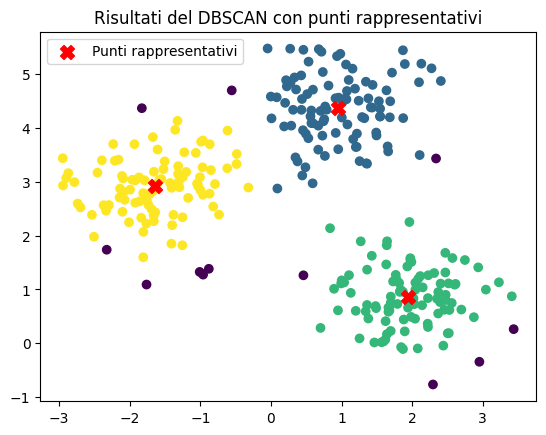

In [5]:

import numpy as np

# Funzione per ottenere un punto rappresentativo per ogni cluster
def get_representative_points(data, labels):
    unique_labels = np.unique(labels)
    representative_points = []
    for label in unique_labels:
        if label == -1:
            continue  # Ignora i punti di rumore
        cluster_points = data[labels == label]
        representative_point = cluster_points.mean(axis=0)  # Calcola il punto medio
        representative_points.append(representative_point)
    return np.array(representative_points)

# Ottieni i punti rappresentativi per ciascun cluster
representative_points = get_representative_points(data, labels)

# Visualizza i risultati
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(representative_points[:, 0], representative_points[:, 1], marker='X', s=100, c='red', label='Punti rappresentativi')
plt.title("Risultati del DBSCAN con punti rappresentativi")
plt.legend()
plt.show()


## Filtraggio di Punti di Rumore e Visualizzazione:

In questa implementazione, abbiamo ulteriormente esteso l'esempio precedente per filtrare i punti di rumore e visualizzarli separatamente dai punti rappresentativi dei cluster. Abbiamo aggiunto la capacità di identificare i punti di rumore (quelli etichettati come -1 da DBSCAN) e li abbiamo visualizzati in grigio. Il codice comprende:

- Creazione di dati di esempio (puoi sostituire con i tuoi dati reali).
- Creazione di un oggetto DBSCAN con parametri epsilon (ε) e minPts specificati.
- Esecuzione del clustering sui dati e ottenimento delle etichette di cluster.
- Definizione di una funzione per ottenere i punti rappresentativi per ciascun cluster.
- Estrazione dei punti di rumore e visualizzazione separata dei punti rappresentativi e dei punti di rumore.

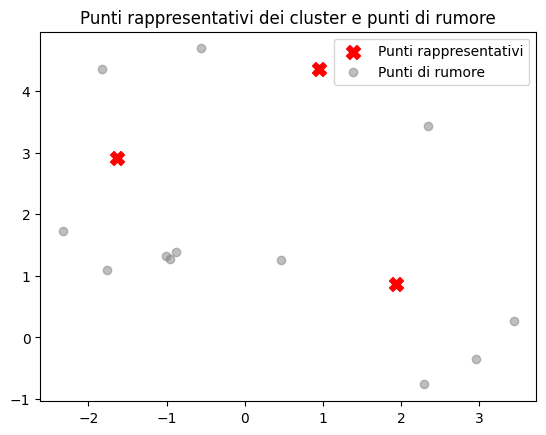

In [6]:
# Ottieni i punti di rumore (etichettati come -1 da DBSCAN)
noise_points = data[labels == -1]

# Visualizza i risultati
plt.scatter(representative_points[:, 0], representative_points[:, 1], marker='X', s=100, c='red', label='Punti rappresentativi')
plt.scatter(noise_points[:, 0], noise_points[:, 1], c='gray', alpha=0.5, label='Punti di rumore')
plt.title("Punti rappresentativi dei cluster e punti di rumore")
plt.legend()
plt.show()
